In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from libra_toolbox.tritium.model import (
    quantity_to_activity,
    activity_to_quantity,
)
from libra_toolbox.tritium.plotting import (
    ureg,
    plot_bars,
    plot_integrated_top_release,
    plot_integrated_wall_release,
    plot_irradiation,
    plot_sample_activity_top,
    plot_sample_activity_wall,
    plot_salt_inventory,
    plot_top_release,
    plot_wall_release,
)

ureg.mpl_formatter = "{:~P}"
# remove top and right axes by default
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# set axis below true by default
plt.rcParams["axes.axisbelow"] = True

from baby_1l_run_1 import *

In [2]:
baby_model.run(50 * ureg.day)


/home/remidm/miniconda3/envs/libra-calculations/lib/python3.13/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [3]:
print(f"Transport:")
print(f"  mass transport coeff top: {baby_model.k_top:.2e~P}")
print(f"  mass transport coeff wall: {baby_model.k_wall:.2e~P}")

print("Source:")
print(f"  TBR: {baby_model.TBR:.2e~P}")
print(f"  neutron rate: {baby_model.neutron_rate:.2e~P}")
print(f"  neutron rate * TBR: {baby_model.neutron_rate * baby_model.TBR:.2e~P}")
print(f"  k_top/k_wall: {baby_model.k_top/baby_model.k_wall:.2f~P}")

print("Geometry:")
print(f"  volume: {baby_model.volume.to(ureg.cm**3):.2f~P}")
print(f"  top area: {baby_model.A_top.to(ureg.cm**2):.2f~P}")
print(f"  wall area: {baby_model.A_wall.to(ureg.cm**2):.2f~P}")

Transport:
  mass transport coeff top: 7.80×10⁻⁸ m/s
  mass transport coeff wall: 2.34×10⁻⁹ m/s
Source:
  TBR: 2.00×10⁻³ particle/n
  neutron rate: 1.06×10⁸ n/s
  neutron rate * TBR: 2.13×10⁵ particle/s
  k_top/k_wall: 33.33
Geometry:
  volume: 1000.00 cm³
  top area: 153.94 cm²
  wall area: 445.87 cm²


Text(0.0, 1.0, 'Cumulative tritium release')

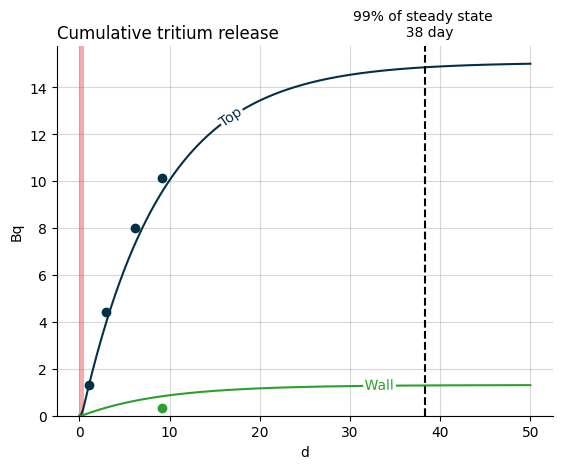

In [4]:
plt.figure()
l, = plot_integrated_top_release(baby_model, color="#023047", label="Top")
plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(replacement_times_top, IV_stream.get_cumulative_activity("total"), color="#023047")
plt.scatter(replacement_times_walls, OV_stream.get_cumulative_activity("total"), color="tab:green")

# add line where top is 99% of final
ydata = l.get_ydata()
xdata = l.get_xdata()
x_99 = xdata[np.argmax(ydata > 0.99 * ydata[-1])]

plt.axvline(x=x_99, color="k", linestyle="--")
plt.annotate(f"99% of steady state \n {x_99: .0f}", (x_99, 0.99 * ydata[-1]), xytext=(0, 20), textcoords="offset points", ha="center", va="bottom", color="k")

plt.title("Cumulative tritium release", loc="left")

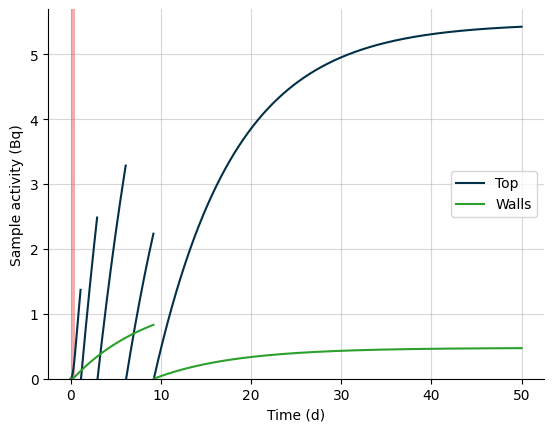

In [5]:
plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="Top")
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="Walls")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.ylim(bottom=0 * ureg.Bq)

plt.ylabel(f"Sample activity ({plt.gca().yaxis.get_units():~P})")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")
plt.legend()
plt.grid(alpha=0.5)

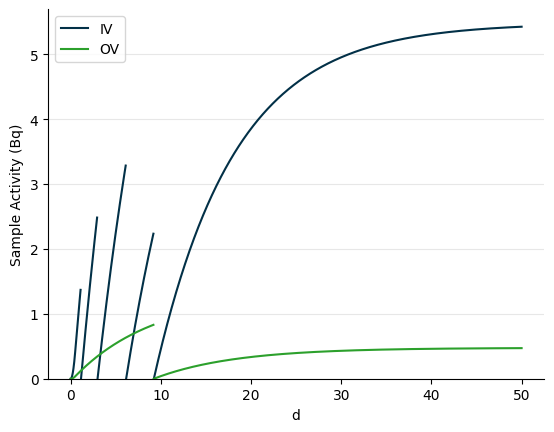

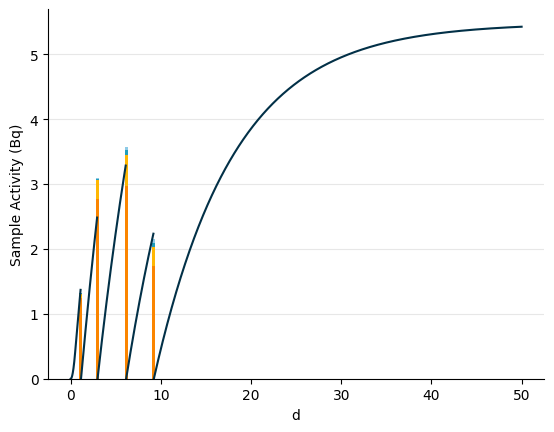

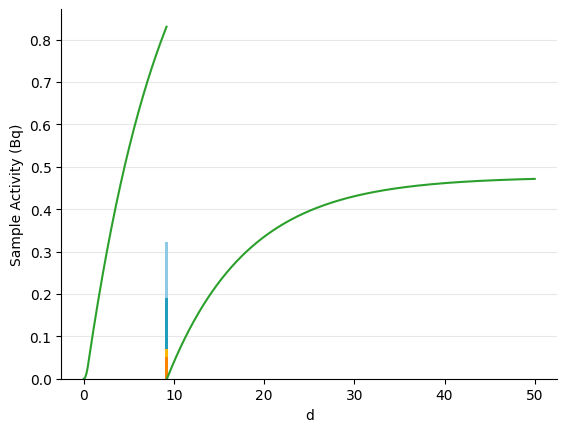

In [6]:
plt.figure()
plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="IV")
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="OV")
plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel("Sample Activity (Bq)")
plt.legend()

plt.figure()
plot_bars(IV_stream, index=[time.to(ureg.day) for time in replacement_times_top])
plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="Model")

plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
# plt.xlim(0, 3)
plt.ylabel("Sample Activity (Bq)")

plt.figure()
plot_bars(OV_stream, index=[time.to(ureg.day) for time in replacement_times_walls])
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="Model")

plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
# plt.xlim(0, 3)
plt.ylabel("Sample Activity (Bq)")

plt.show()